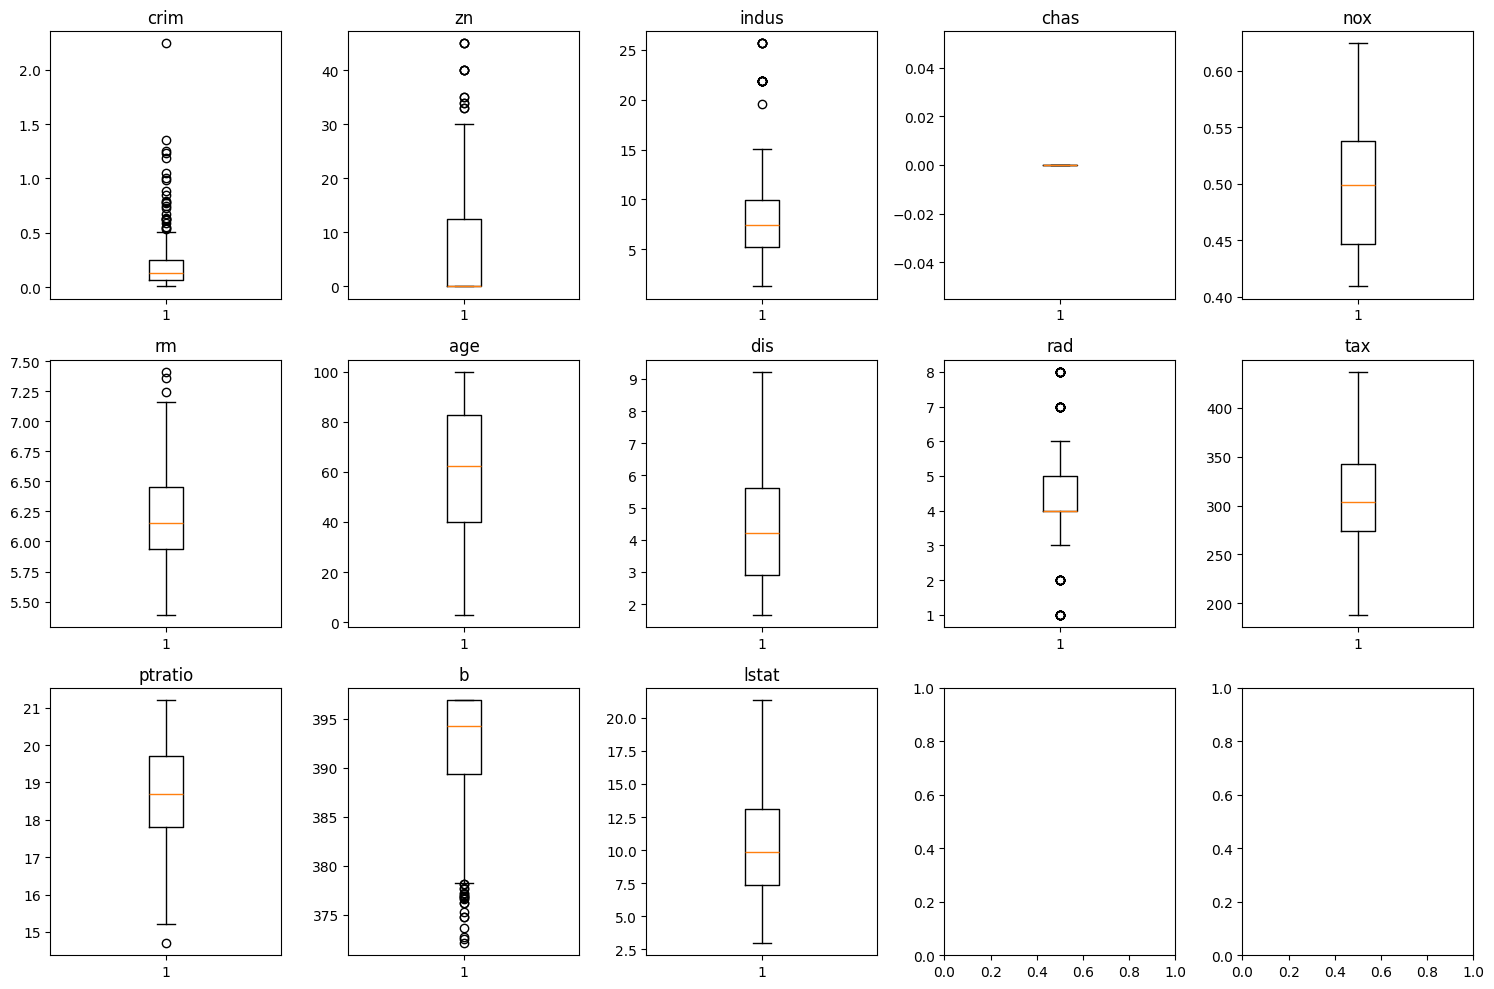

LinearRegression: MSE = 3.3627900011835674, R2 = 0.6937974135834438
Ridge: MSE = 3.3275435415161945, R2 = 0.6970068191985366
Lasso: MSE = 3.4815168102777374, R2 = 0.6829866118358401
SVR: MSE = 2.6437060615990426, R2 = 0.7592744020584576
RandomForest: MSE = 4.473585290697675, R2 = 0.5926527121572962


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

def load_data(filepath):
    """加载并初步处理数据。"""
    data = pd.read_csv(filepath, encoding='utf-8')
    data.rename(columns=lambda x: x.strip(), inplace=True)
    return data

def clean_data(data):
    """清洗数据，包括处理缺失值和异常值。"""
    data.fillna(data.median(), inplace=True)
    for col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        data = data[(data[col] >= Q1 - 1.5 * IQR) & (data[col] <= Q3 + 1.5 * IQR)]
    return data

def visualize_data(data):
    """数据可视化。"""
    fig, axes = plt.subplots(3, 5, figsize=(15, 10))
    for i, col in enumerate(data.columns[:-1]):
        axes[i//5, i%5].boxplot(data[col])
        axes[i//5, i%5].set_title(col)
    plt.tight_layout()
    plt.show()

def train_models(X, y):
    """训练多个模型并返回最佳参数和模型。"""
    models = {
        'LinearRegression': LinearRegression(),
        'Ridge': Ridge(),
        'Lasso': Lasso(),
        'SVR': SVR(),
        'RandomForest': RandomForestRegressor()
    }
    params = {
        'LinearRegression': {},
        'Ridge': {'alpha': [0.1, 1.0, 10.0]},
        'Lasso': {'alpha': [0.1, 0.5, 1.0]},
        'SVR': {'C': [0.1, 1.0, 10.0], 'kernel': ['linear', 'poly', 'rbf']},
        'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
    }
    best_estimators = {}
    for name, model in models.items():
        grid = GridSearchCV(model, params[name], cv=10, scoring='neg_mean_squared_error')
        grid.fit(X, y)
        best_estimators[name] = grid.best_estimator_
    return best_estimators

def evaluate_models(models, X_test, y_test):
    """评估模型。"""
    results = {}
    for name, model in models.items():
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[name] = {'MSE': mse, 'R2': r2}
    return results

def main():
    data = load_data('C:\\Users\\10075\\Downloads\\Ai-Study\\DataSet\\Boston Housing.csv')
    data_cleaned = clean_data(data)
    visualize_data(data_cleaned)

    X = data_cleaned.drop('medv', axis=1)
    y = data_cleaned['medv']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    models = train_models(X_train_scaled, y_train)
    results = evaluate_models(models, X_test_scaled, y_test)
    for model, metrics in results.items():
        print(f"{model}: MSE = {metrics['MSE']}, R2 = {metrics['R2']}")

if __name__ == "__main__":
    main()
